# Non-Text Data Exploration

In [1]:
!pip install pandas-profiling[notebook]
!pip install nltk
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [3]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,kyl77,36-43,21 days ago,This blush is suppose to be a universally flat...,5.0,65%,4.1,4
1,1,Blush - Orgasm,ladyinred29,44-55,25 days ago,This blush is a beautiful color. It isn't ter...,3.0,65%,4.1,4
2,2,Blush - Orgasm,BougieAngel,30-35,a month ago,After purchasing this I didn't want to touch i...,4.0,65%,4.1,4
3,3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
4,4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4


In [4]:
# quick data exploration with pandas profiling
profile = ProfileReport(products, title="MakeUpAlley Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
print(products.shape)
print(products.info())

(10351, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   df_index    10351 non-null  int64  
 1   product     10351 non-null  object 
 2   user_id     10351 non-null  object 
 3   age         10104 non-null  object 
 4   date        10351 non-null  object 
 5   review      10351 non-null  object 
 6   ratings     10351 non-null  float64
 7   repurchase  10351 non-null  object 
 8   packaging   10351 non-null  float64
 9   price       10351 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 808.8+ KB
None


In [6]:
# Check for presence of NaN values
products.isnull().sum()

df_index        0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [7]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

df_index      0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [8]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5332
Blush - Deep Throat    1165
Blush - Sin             766
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [9]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
izzybella            9
                    ..
knitsnbytes          1
muddles              1
getsinyoureyes       1
BDfangirl            1
emmeline24           1
Name: user_id, Length: 7956, dtype: int64

In [10]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1337
12 years ago     1236
10 years ago     1117
13 years ago      880
17 years ago      759
16 years ago      719
9 years ago       699
14 years ago      697
15 years ago      673
18 years ago      633
8 years ago       542
7 years ago       336
6 years ago       228
5 years ago       141
19 years ago      132
4 years ago        81
3 years ago        48
2 years ago        34
20 years ago       25
a year ago         18
7 months ago        3
8 months ago        2
10 months ago       2
3 months ago        2
2 months ago        1
6 months ago        1
9 months ago        1
21 days ago         1
25 days ago         1
a month ago         1
5 months ago        1
Name: date, dtype: int64

In [11]:
products['price'].value_counts()
# Drop this feature because not useful

4    10351
Name: price, dtype: int64

In [12]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5563
4.0    2393
3.0    1403
2.0     673
1.0     319
Name: ratings, dtype: int64

In [13]:
products['age'].value_counts()

19-24        3994
25-29        2539
30-35        1601
36-43         873
Under 18      872
44-55         384
56 & Over      88
Name: age, dtype: int64

In [14]:
products['packaging'].value_counts()
# Generally Good packaging rating because at least 4/5

4.1    5581
4.2    2351
4.3    2109
4.4     310
Name: packaging, dtype: int64

In [15]:
products['repurchase'].value_counts()
# All are above 50% repurchase rating

65%    5332
79%    1490
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [16]:
products.groupby(['product'])['repurchase'].value_counts()
# Every product only has 1 repurchase rating, cannot be used to decide if one reviewer is more likely to repurchase

product              repurchase
Blush - Amour        86%            310
Blush - Angelika     79%            297
Blush - Deep Throat  81%           1165
Blush - Dolce Vita   79%            155
Blush - Exhibit A    86%            371
Blush - Luster       88%            302
Blush - Madly        81%            248
Blush - Orgasm       65%           5332
Blush - Sex Appeal   75%            125
Blush - Sin          79%            766
Blush - Taj Mahal    85%            262
Blush - Torrid       86%            497
Mata Hari Blush      79%            272
Super Orgasm         57%            249
Name: repurchase, dtype: int64

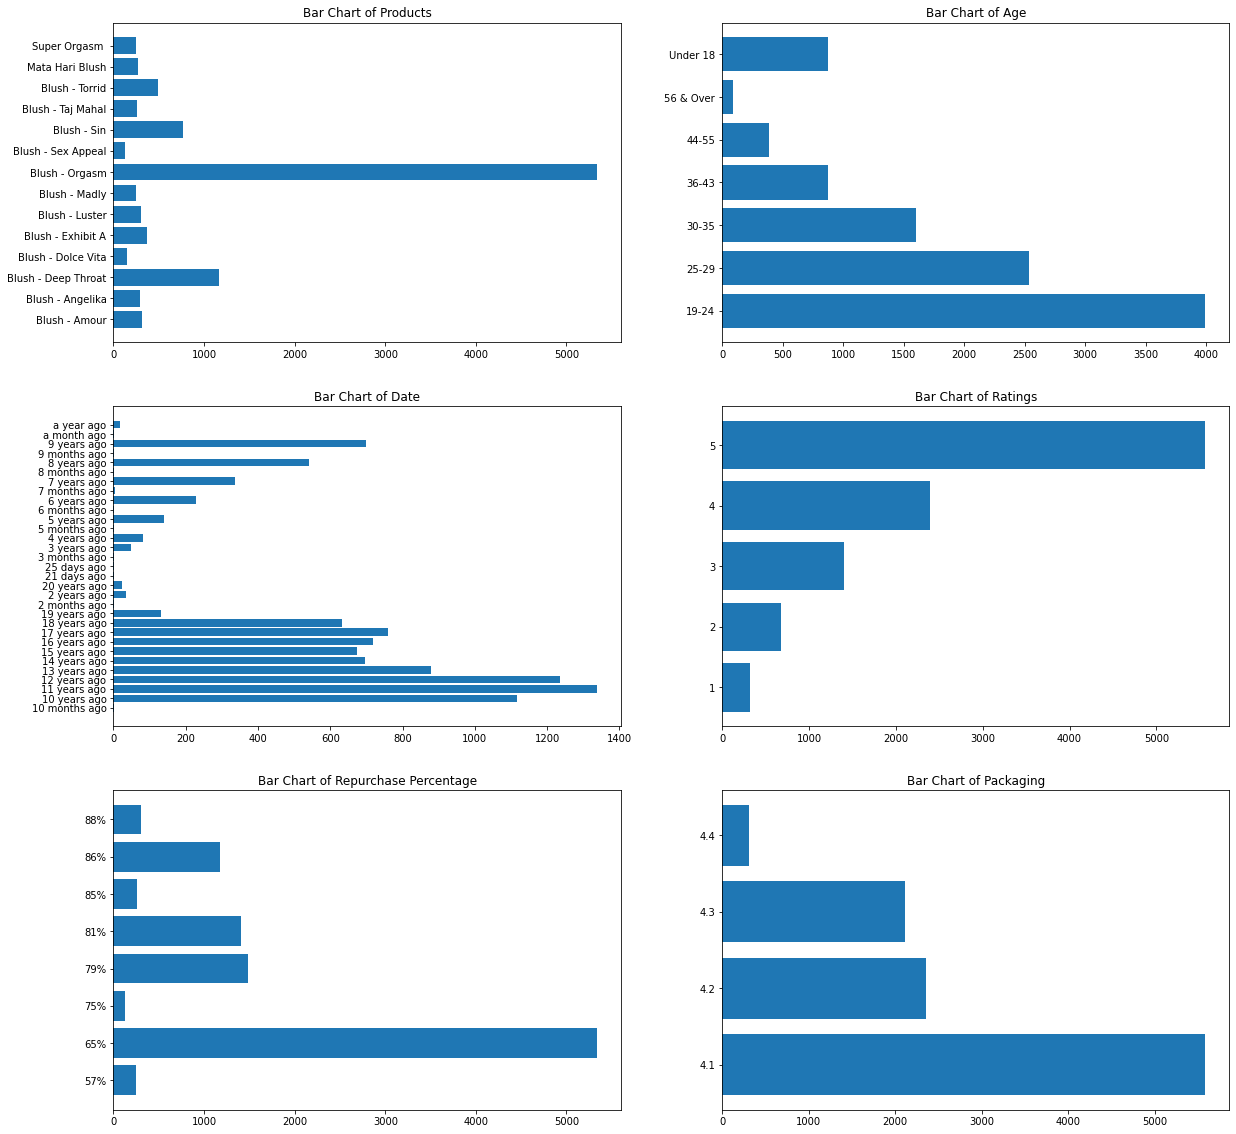

In [17]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].astype(str).value_counts().sort_index().index,products['packaging'].astype(str).value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [18]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [19]:
# Check for random sample of reviews
pd.set_option('display.max_colwidth', 200)
products['review'].sample(n=10)

5460    I absolutely love this blush. It is perfect for every day wear but also great for a special occasion. It looks great as a part of natural look, but the I've also found that the color does not dist...
7595    I won't repeat what others have said about NARS blush quality - finely milled, heavily pigmented but blendable, and longlasting - and neither will I comment about the silly dust attracting materia...
5141                                                                                                                  Perfect colour for me. It's one of the few powder blushes that doesn't make me look sick.
9574    i asked the sephora sales associate for a baby pink blush that i can use everyday, and he recommended this. i looked in the pan and it looked very warm to me. but when i tried it on, it really doe...
3235    Nice pretty color and nice quality blush but it is not for me. i am NC35 and I have to layer this and only get the shimmer. Not working well as a highlighter ei

count    10351.000000
mean       449.610859
std        348.451299
min          0.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64


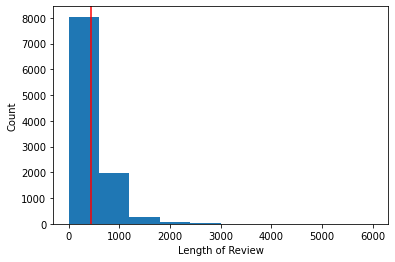

In [20]:
products['review_length'] = products['review'].apply(lambda x: len(x.strip()))

plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis, average of 450 words

<AxesSubplot:>

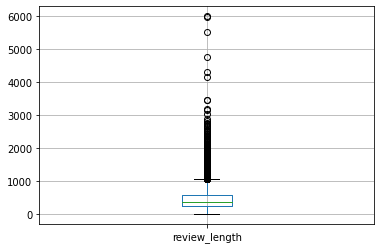

In [21]:
# Check for presence of outliers
products.boxplot('review_length')

In [22]:
# Explore the reviews that have very long lengths
products[products['review_length'] > 3000]

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
51,76,Blush - Orgasm,valmont32677,36-43,3 years ago,The “Markle Sparkle” prevails! Meghan Markle loves this blush (the duchess of Sussex). And it’s easy to see why! It’s a super easy to wear peachy golden sheen. It gives my face light. I bought thi...,5.0,65%,4.1,4,4317
550,825,Blush - Orgasm,Labloah,36-43,8 years ago,"Yes, it's a hyped product, but after trying this, I can certainly see why people adore it.\r\n\r\nI must admit, it took me a while to actually splurge and buy this, as I couldn't justify spending ...",5.0,65%,4.1,4,3463
2823,4233,Blush - Orgasm,strawberita1,30-35,12 years ago,I am very sad that I waited so long to purchase this blush. I will break down why I adore it so much. I apologize in advance for this long review although I hope it is informative.\r\n\r\n\r\nColo...,5.0,65%,4.1,4,3033
2855,4280,Blush - Orgasm,lipglosseater,19-24,12 years ago,"*Click on ""Continued>>"" to view pics / full review*\r\n\r\n<img src=""http://i100.photobucket.com/albums/m35/medagreat/orgasm.jpg"" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$25 (appro...",4.0,65%,4.1,4,5991
3085,4625,Blush - Orgasm,gingerrama,30-35,13 years ago,"UPDATE: Well, it's very nice, but there are now plenty of Orgasmalikes out there, and plenty that don't irritate or make pores look big or glittery. But I'll leave this up, as my first proper blus...",3.0,65%,4.1,4,5519
5455,8184,Blush - Deep Throat,genarod,25-29,8 years ago,"This is a very easy blush to fall in love with.\r\n\r\nI guess to start I will say that I am light skinned, a nc15-20, with medium brown hair/eyes. I have a slight olive undertone, but mostly jus...",4.0,81%,4.2,4,3151
6022,9036,Blush - Deep Throat,lipglosseater,19-24,12 years ago,"*Click on ""Continued>>"" to view pics / full review*\r\n\r\n<img src=""http://i100.photobucket.com/albums/m35/medagreat/Narsdeepthroat.jpg"" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$2...",5.0,81%,4.2,4,6000
7653,11488,Blush - Dolce Vita,storybookheroine,30-35,12 years ago,"When the first pictures of Dolce Vita popped up on the internet I have to admit I was disappointed. It was dark, muddy, matte and did nothing to make me want it. Now I LOVE Dolce Vita lipst...",4.0,79%,4.3,4,3183
8190,12297,Blush - Taj Mahal,scarski91,25-29,4 years ago,"Skin ref: Lancome Teint Miracle in #005 Beige Ivory. Very fair -fair skin with warm yellow/gold undertones. Golden blonde hair warm honey-like blonde highlights, hazel eyes (brown-green) that chan...",5.0,85%,4.2,4,3450
8642,12976,Blush - Exhibit A,J_cool,25-29,12 years ago,"Upon reading dozens of reviews on NARS’ Exhibit A blush, I was really excited about purchasing it. After several days of using the product, I can honestly say that it is, indeed, different than an...",1.0,86%,4.3,4,4149


In [23]:
# Check for number of rows that contains "*Click on "Continued>>"
products['review'].str.contains('\*Click on "Continued>>').sum()

3

In [24]:
# Remove reviews that contains "*Click on "Continued>>"
products = products[~products['review'].str.contains('\*Click on "Continued>>')]

In [25]:
# Check for review with 0 length
products[products['review_length'] == 0]

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
466,696,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,0


In [26]:
# Remove the review 
products = products[products['review_length'] > 0]

In [27]:
# Check for current min review length
products['review_length'].describe()

count    10347.000000
mean       448.163816
std        337.172719
min          4.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       5519.000000
Name: review_length, dtype: float64

In [28]:
# Check for review with small length to see if sufficient for analysis
products[products['review_length'] <= 10]

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
26,36,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9
126,186,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4
274,409,Blush - Orgasm,linehmor,19-24,6 years ago,its okey.,4.0,65%,4.1,4,9
512,767,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8
1565,2345,Blush - Orgasm,Odaa,19-24,10 years ago,Love <3,5.0,65%,4.1,4,7
2953,4428,Blush - Orgasm,lisagibb,25-29,13 years ago,love it!,5.0,65%,4.1,4,8
3067,4597,Blush - Orgasm,car123,19-24,13 years ago,love it!,5.0,65%,4.1,4,8
3891,5836,Blush - Orgasm,princesslori431,19-24,15 years ago,LOVE IT,5.0,65%,4.1,4,7
3967,5947,Blush - Orgasm,Acnetha,Under 18,15 years ago,its ok,3.0,65%,4.1,4,6
4005,6005,Blush - Orgasm,strony123,25-29,15 years ago,Great!,3.0,65%,4.1,4,6


In [29]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [30]:
products['english'].value_counts()

True     10322
False       25
Name: english, dtype: int64

In [31]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
2925,4385,Blush - Orgasm,mipbep,36-43,12 years ago,"I went out to Sunday brunch with friends the other day, wearing minimal makeup including a little of this blush to perk things up. An older gentleman walked up to me and asked me if people always ...",5.0,65%,4.1,4,475,True
4515,6771,Blush - Orgasm,alexalindh,Under 18,16 years ago,"Very natural color. Orgasm worked very well with my skintone, and evened out the natural pink in my cheeks. Works well in an everyday routine. NARS packaging is also very solid and high-quality...",4.0,65%,4.1,4,625,True
6315,9475,Blush - Deep Throat,jules007,25-29,16 years ago,"My HG blush! I have the Orgasm blush and was satisified with it, until I tried Deep Throat! I actually think it is more flattering on my NC35 skin. It makes a more natural flush with more subtle ...",5.0,81%,4.2,4,363,True
3039,4554,Blush - Orgasm,m1029,Under 18,13 years ago,"this blush is amazing. mars has lots of blushes but this one fits almost any skin tone! during the summer i burn then tan and durig the winter i can get pretty pale, but this blush got perfectly a...",5.0,65%,4.1,4,460,True
3238,4853,Blush - Orgasm,honey123,30-35,13 years ago,"After a lot of research on here and other less fabulous places I decided I had to try this.\r\n\r\nI am Uber pale at the moment (MAC NC15, Benefit playsticks Jax colour) but its this or have a go...",4.0,65%,4.1,4,1364,True


In [32]:
# Check to see which review are wrongly classified as english == False
products[products['english'] == False]

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
23,33,Blush - Orgasm,mixen,25-29,2 years ago,Best colour!,5.0,65%,4.1,4,12,False
26,36,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9,False
126,186,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4,False
512,767,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8,False
580,870,Blush - Orgasm,Marivale,36-43,8 years ago,"Es uno de mis blush preferidos, de un tono rosado muy sentador que se funde bien con la piel. Es apropiado para tonos de piel claros a medios, y tiene un shimmer que ilumina la piel dÃ¡ndole un t...",4.0,65%,4.1,4,275,False
1331,1996,Blush - Orgasm,anairam1980,30-35,10 years ago,Best blush ever!,5.0,65%,4.1,4,16,False
1565,2345,Blush - Orgasm,Odaa,19-24,10 years ago,Love <3,5.0,65%,4.1,4,7,False
2447,3667,Blush - Orgasm,AllieRae,19-24,12 years ago,love love LOVE!,5.0,65%,4.1,4,15,False
2919,4374,Blush - Orgasm,jalovette,30-35,12 years ago,Excellent colour,5.0,65%,4.1,4,16,False
2953,4428,Blush - Orgasm,lisagibb,25-29,13 years ago,love it!,5.0,65%,4.1,4,8,False


In [33]:
# Drop Non-English reviews
not_eng = [580, 7285, 8205]
products = products.drop(index=not_eng)
products = products.drop(['english'],axis=1)
products

,df_index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
0,0,Blush - Orgasm,kyl77,36-43,21 days ago,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",5.0,65%,4.1,4,565
1,1,Blush - Orgasm,ladyinred29,44-55,25 days ago,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",3.0,65%,4.1,4,574
2,2,Blush - Orgasm,BougieAngel,30-35,a month ago,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",4.0,65%,4.1,4,331
3,3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",5.0,65%,4.1,4,893
4,4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,4.0,65%,4.1,4,331
...,...,...,...,...,...,...,...,...,...,...,...
10346,15538,Blush - Torrid,sanrosee,19-24,18 years ago,"A peach-tangerine color with a pink undertone and slight shimmer. Somewhat similar to Orgasm, but with less pink. It is a beautiful color, but strong peach shades do not compliment my complexion.",4.0,86%,4.2,4,197
10347,15539,Blush - Torrid,BarbaraN,36-43,18 years ago,I purchased this recently and it is a very lovely bright peachy-coral colored blush that is very pigmented. I think I will find myself reaching for this more in the spring and summer when I have ...,5.0,86%,4.2,4,282
10348,15540,Blush - Torrid,jennyb,30-35,18 years ago,"What a beautiful shade this is! A deep peach, pinky rather than bricky, with a slight shimmer. On the face, it reads a little more pink than it does in the pan. The shimmer is just a subtle glow, ...",5.0,86%,4.2,4,980
10349,15541,Blush - Torrid,Helen,19-24,18 years ago,"This is gorgeous--darker than nars Orgasm and seemed a bit less shimmery to me. If I didn't already own Orgasm, I would definitely buy this, but they are too similar to own both IMO.",4.0,86%,4.2,4,182


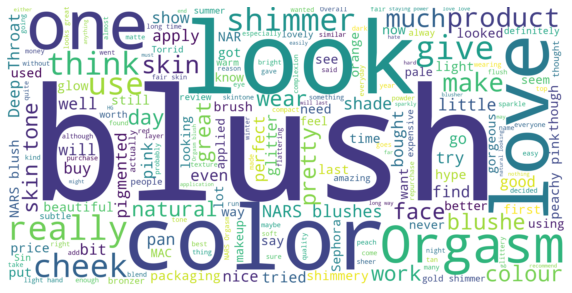

In [34]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

#Most common words are stop-words and a domain specific word (blush)

,word,occurences
1754,I,22396.0
3347,a,14059.0
3588,and,13421.0
10052,the,12466.0
6893,it,10855.0
6883,is,7768.0
10153,to,7718.0
10087,this,7283.0
4252,but,7013.0
7664,my,6571.0


# Non-Text Data Pre-processing

In [37]:
# Drop not useful columns
products.drop(columns=['df_index','price','user_id'], inplace=True)

In [38]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

In [39]:
# Check if the dates are formatted correctly
products['date'].value_counts()

-11    1337
-12    1233
-10    1117
-13     880
-9      699
-8      541
-7      333
-6      228
-5      141
-4       81
-3       48
-2       34
-1       34
Name: date, dtype: int64

In [40]:
# Convert repurchase column to numerical
products['repurchase'] = products['repurchase'].apply(lambda x : float(x.strip('%'))/100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase_again'] = products['ratings'].apply(lambda x: 0 if x < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,product,age,date,review,repurchase,packaging,review_length,repurchase_again
0,Blush - Orgasm,36-43,-1,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",0.65,4.1,565,1
1,Blush - Orgasm,44-55,-1,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",0.65,4.1,574,0
2,Blush - Orgasm,30-35,-1,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",0.65,4.1,331,1
3,Blush - Orgasm,44-55,-1,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",0.65,4.1,893,1
4,Blush - Orgasm,30-35,-1,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,0.65,4.1,331,1


In [42]:
products['repurchase_again'].value_counts()
# No need to account for class imbalance

1    5075
0    1631
Name: repurchase_again, dtype: int64

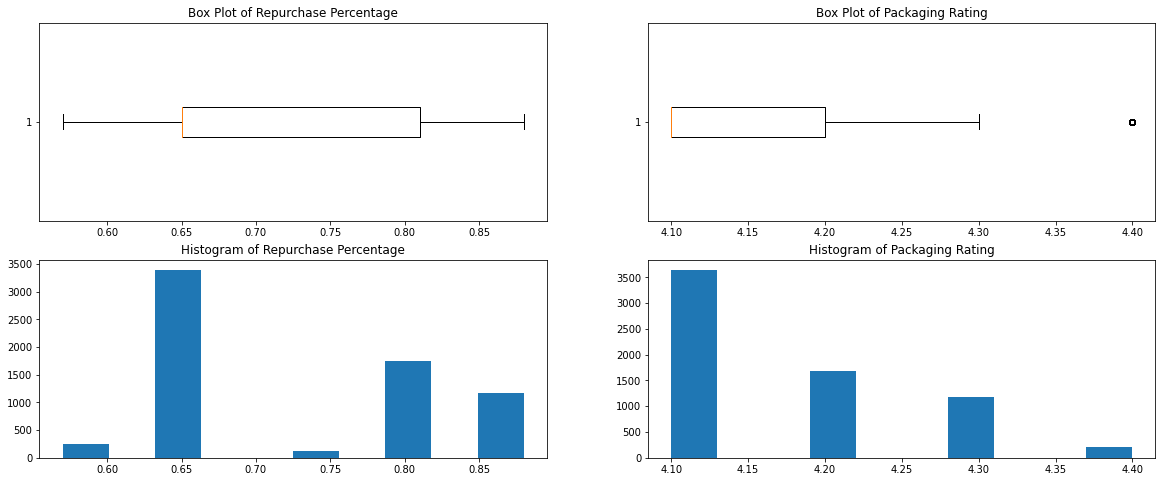

In [43]:
# Boxplot and histogram of Repurchase and Packaging columns
fig, ax = plt.subplots(2,2,figsize=(20,8))
ax[0,0].boxplot(products['repurchase'],vert=False)
ax[0,0].title.set_text('Box Plot of Repurchase Percentage')
ax[1,0].hist(products['repurchase'])
ax[1,0].title.set_text('Histogram of Repurchase Percentage')
ax[0,1].boxplot(products['packaging'],vert=False)
ax[0,1].title.set_text('Box Plot of Packaging Rating')
ax[1,1].hist(products['packaging'])
ax[1,1].title.set_text('Histogram of Packaging Rating')

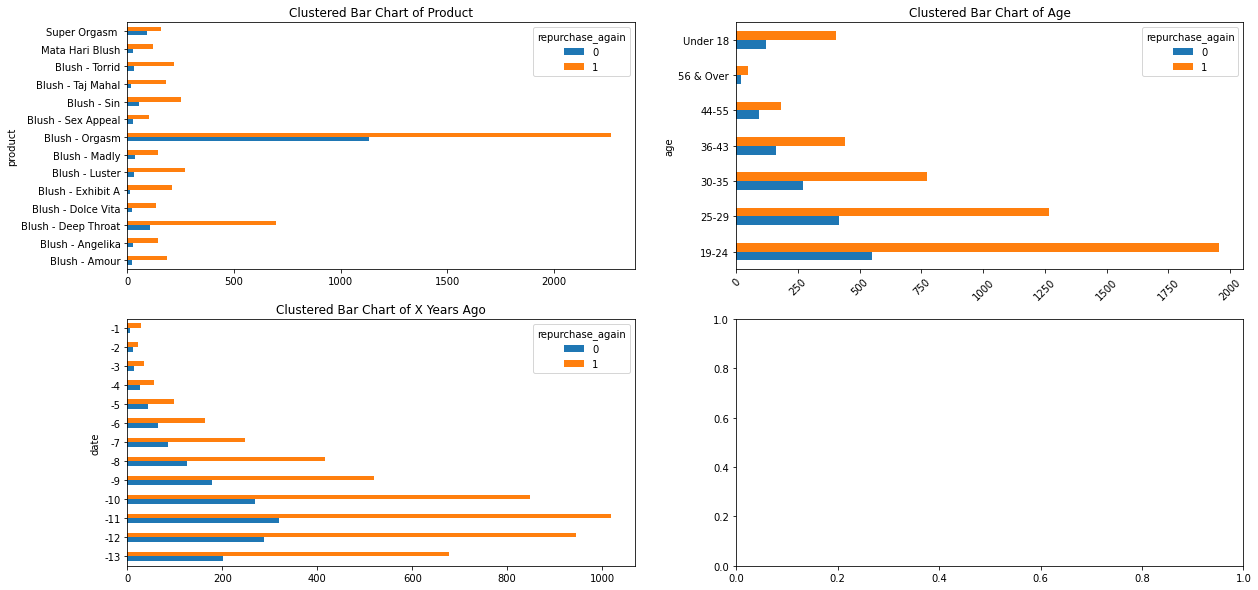

In [44]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig, ax = plt.subplots(2,2,figsize=(20,10))
products.groupby(['product','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,0])
ax[0,0].title.set_text('Clustered Bar Chart of Product')
ax[0,0].tick_params(axis='x', labelrotation=0)

products.groupby(['age','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,1])
ax[0,1].title.set_text('Clustered Bar Chart of Age')
ax[0,1].tick_params(axis='x', labelrotation=45)

products.groupby(['date','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,0])
ax[1,0].title.set_text('Clustered Bar Chart of X Years Ago')
ax[1,0].tick_params(axis='x', labelrotation=0)

# products.groupby(['repurchase','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,1])
# ax[1,1].title.set_text('Clustered Bar Chart of Repurchase Percentage')
# ax[1,1].tick_params(axis='x', labelrotation=0)

# products.groupby(['packaging','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[2,0])
# ax[2,0].title.set_text('Clustered Bar Chart of Packaging Rating')
# ax[2,0].tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category
# 65% Repurchase Percentage, Blush - Orgasm and 4.1 Packaging Rating have a much higher proportion of those not willing to repurchase; should analyze these groups 

<AxesSubplot:title={'center':'packaging'}, xlabel='repurchase_again'>

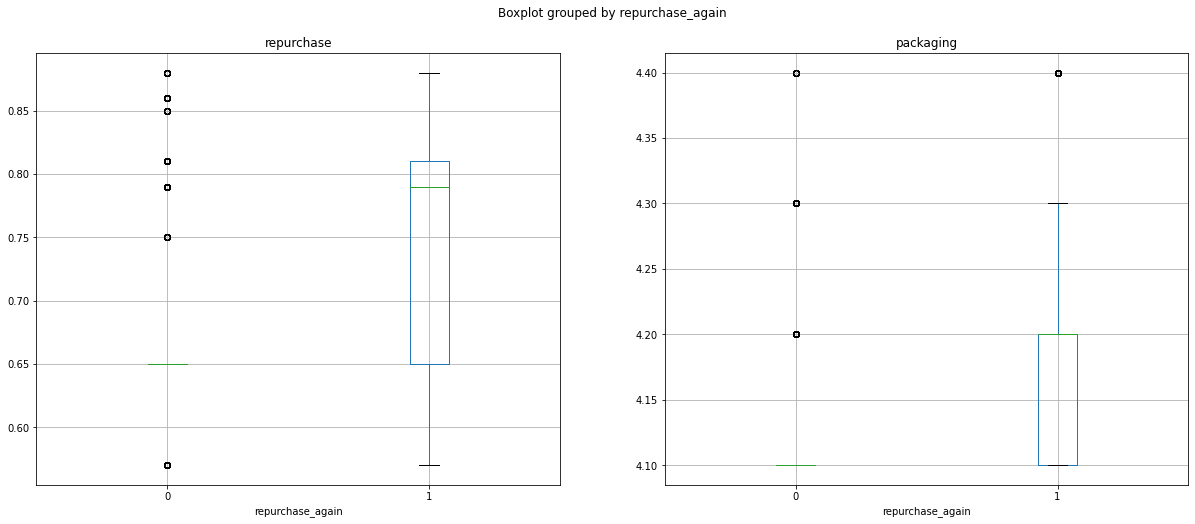

In [45]:
# Boxplot of repurchase and packaging attributes by repurchase_again
fig, ax = plt.subplots(1,2,figsize=(20,8))
products.boxplot('repurchase', by='repurchase_again', ax=ax[0])
products.boxplot('packaging', by='repurchase_again', ax=ax[1])
# Those likely to repurchase again have give higher repurchase ratings and packaging ratings

In [50]:
products.corr()

,date,repurchase,packaging,review_length,repurchase_again
date,1.000000,-0.035592,-0.028083,0.042245,-0.030943
repurchase,-0.035592,1.000000,0.826750,0.079045,0.239467
packaging,-0.028083,0.826750,1.000000,0.081031,0.203778
review_length,0.042245,0.079045,0.081031,1.000000,0.011251
repurchase_again,-0.030943,0.239467,0.203778,0.011251,1.000000


# Text Data Preprocessing

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob, Word

[nltk_data] Downloading package stopwords to /Users/min/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/min/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
# Remove line breaks
def remove_breaks(text):
  text = re.sub(r'\r', '', text)
  return re.sub(r'\n', '', text)

products['review_processed'] = products['review'].apply(lambda x: remove_breaks(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
# Remove links
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

products['review_processed'] = products['review_processed'].apply(lambda x: remove_urls(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
# Covert to lowercase
products['review_processed_lower'] = products['review_processed'].apply(lambda x: x.lower())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
# Expand Contractions
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Function to perform expansion of contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

products['review_processed'] = products['review_processed'].apply(lambda x : expand_contractions(x,contractions_dict))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x : expand_contractions(x,contractions_dict))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
# Remove punctuations
products['review_processed_lower_punc'] = products['review_processed_lower'].str.replace('[^\w\s]','')
products['review_processed_punc'] = products['review_processed'].str.replace('[^\w\s]','')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [57]:
# Remove digits (including words that contain digits because makeup products)
products['review_processed'] = products['review_processed'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [58]:
# Lemmatization
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [59]:
# Remove extra whitespaces
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join(x.split()))
products['review_processed_lower'] = products['review_processed_lower'].apply(lambda x: " ".join(x.split()))
products['review_processed_lower_punc'] = products['review_processed_lower_punc'].apply(lambda x: " ".join(x.split()))
products['review_processed_punc'] = products['review_processed_punc'].apply(lambda x: " ".join(x.split()))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [60]:
# Check sample of preprocessed reviews
review_sample = products[['review', 'review_processed', 'review_processed_lower', 'review_processed_lower_punc', 'review_processed_punc']].sample(n=10)
review_sample

,review,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc
102,"Bought this because everybody raves about it and it has such great reviews, color way to pink and no good for my tan skin tone :( also not very pigmented :\","Bought this because everybody raf about it and it ha such great reviews, color way to pink and no good for my tan skin tone :( also not very pigmented :\","bought this because everybody raf about it and it ha such great reviews, color way to pink and no good for my tan skin tone :( also not very pigmented :\",bought this because everybody raf about it and it ha such great review color way to pink and no good for my tan skin tone also not very pigmented,Bought this because everybody raf about it and it ha such great review color way to pink and no good for my tan skin tone also not very pigmented
397,"I really like this blush, it's beautiful and glowy when first applied but it doesn't last long on me at all. This brand also tests on animals and I won't be repurchasing it for that reason alone. ...","I really like this blush, it is beautiful and glowy when first applied but it doe not last long on me at all. This brand also test on animal and I will not be repurchasing it for that reason alone...","i really like this blush, it is beautiful and glowy when first applied but it doe not last long on me at all. this brand also test on animal and i will not be repurchasing it for that reason alone...",i really like this blush it is beautiful and glowy when first applied but it doe not last long on me at all this brand also test on animal and i will not be repurchasing it for that reason alone f...,I really like this blush it is beautiful and glowy when first applied but it doe not last long on me at all This brand also test on animal and I will not be repurchasing it for that reason alone F...
1137,"i really don't get the hype.. on me, it looked like a fairy beat me with her wand.. there were glittery pieces everywhere.. i thought maybe i got a bad one, i know that can happen, but there are b...","i really do not get the hype.. on me, it looked like a fairy beat me with her wand.. there were glittery piece everywhere.. i thought maybe i got a bad one, i know that can happen, but there are b...","i really do not get the hype.. on me, it looked like a fairy beat me with her wand.. there were glittery piece everywhere.. i thought maybe i got a bad one, i know that can happen, but there are b...",i really do not get the hype on me it looked like a fairy beat me with her wand there were glittery piece everywhere i thought maybe i got a bad one i know that can happen but there are better out...,i really do not get the hype on me it looked like a fairy beat me with her wand there were glittery piece everywhere i thought maybe i got a bad one i know that can happen but there are better out...
8566,I bought this because of the great reviews and I must say I love it. I even dab this on when I am lazing at home with no makeup on but lip balm. I hate spending this kind of money on a blush but y...,I bought this because of the great review and I must say I love it. I even dab this on when I am lazing at home with no makeup on but lip balm. I hate spending this kind of money on a blush but yo...,i bought this because of the great review and i must say i love it. i even dab this on when i am lazing at home with no makeup on but lip balm. i hate spending this kind of money on a blush but yo...,i bought this because of the great review and i must say i love it i even dab this on when i am lazing at home with no makeup on but lip balm i hate spending this kind of money on a blush but you ...,I bought this because of the great review and I must say I love it I even dab this on when I am lazing at home with no makeup on but lip balm I hate spending this kind of money on a blush but you ...
7665,"Part of the fall 08 collection, Dolce Vita is matte dark rose with a hint of red. It looks almost too d

# Feature Engineering

In [61]:
from sklearn import preprocessing
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/min/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [63]:
# Normalize the numerical columns so that the data remains in its proportional distribution (data distribution is not gaussian so cannot use standardization)
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Normalize the numeric columns
products[['repurchase','packaging','date']] = scaler.fit_transform(products[['repurchase','packaging','date']])

In [64]:
products.head(5)

,date,review,repurchase,packaging,review_length,repurchase_again,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc,...,product_Blush - Taj Mahal,product_Blush - Torrid,product_Mata Hari Blush,product_Super Orgasm,age_25-29,age_30-35,age_36-43,age_44-55,age_56 & Over,age_Under 18
0,1.0,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",0.258065,0.0,565,1,"This blush is suppose to be a universally flattering color. I am not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I am fair with cool undertone...","this blush is suppose to be a universally flattering color. i am not sure if that is actually possible, but i do think it would flatter a lot of different skin tones. i am fair with cool undertone...",this blush is suppose to be a universally flattering color i am not sure if that is actually possible but i do think it would flatter a lot of different skin tone i am fair with cool undertone and...,This blush is suppose to be a universally flattering color I am not sure if that is actually possible but I do think it would flatter a lot of different skin tone I am fair with cool undertone and...,...,0,0,0,0,0,0,1,0,0,0
1,1.0,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",0.258065,0.0,574,0,"This blush is a beautiful color. It is not terribly pigmented imho, but it give a lovely glow on my fair, cool skin, and it is luminescent.The problem I have with this product is the packaging. I ...","this blush is a beautiful color. it is not terribly pigmented imho, but it give a lovely glow on my fair, cool skin, and it is luminescent.the problem i have with this product is the packaging. i ...",this blush is a beautiful color it is not terribly pigmented imho but it give a lovely glow on my fair cool skin and it is luminescentthe problem i have with this product is the packaging i have h...,This blush is a beautiful color It is not terribly pigmented imho but it give a lovely glow on my fair cool skin and it is luminescentThe problem I have with this product is the packaging I have h...,...,0,0,0,0,0,0,0,1,0,0
2,1.0,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",0.258065,0.0,331,1,"After purchasing this I did not want to touch it coz it wa soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...","after purchasing this i did not want to touch it coz it wa soo pretty! i love the colour, pigment and texture, and the packaging is also awesome. not much into makeup but blush is always in my bea...",after purchasing this i did not want to touch it coz it wa soo pretty i love the colour pigment and texture and the packaging is also awesome not much into makeup but blush is always in my beauty ...,After purchasing this I did not want to touch it coz it wa soo pretty I love the colour pigment and texture and the packaging is also awesome Not much into makeup but blush is always in my beauty ...,...,0,0,0,0,0,1,0,0,0,0
3,1.0,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",0.258065,0.0,893,1,"I am , Caucasian with olive undertone so true pink and mauve look terrible and coral are perfect which is why I LOVE this blush. I love the shimmer on my cheek bone and temple and use Clinique Chu...","i am , caucasian with olive undertone so true pink and mauve look terrible and coral ar

In [65]:
# Initialise VADER Sentiment Analyser
analyzer = SentimentIntensityAnalyzer()

In [66]:
# Check whether lowercase and punctuations affect VADER sentiment score
review_sample_scores = pd.DataFrame(columns = ['Text']+list(review_sample.columns))

for row in range(len(review_sample)):
    result = {}
    
    for col in review_sample.columns:
        vs = analyzer.polarity_scores(review_sample[col].iloc[row])
        result[col] = vs['compound']
    
    review_sample_scores = review_sample_scores.append(result, ignore_index=True)
    
review_sample_scores['Text'] = review_sample['review'].reset_index(drop=True)

In [67]:
review_sample_scores

,Text,review,review_processed,review_processed_lower,review_processed_lower_punc,review_processed_punc
0,"Bought this because everybody raves about it and it has such great reviews, color way to pink and no good for my tan skin tone :( also not very pigmented :\",0.6209,0.7556,0.7556,0.8020,0.8020
1,"I really like this blush, it's beautiful and glowy when first applied but it doesn't last long on me at all. This brand also tests on animals and I won't be repurchasing it for that reason alone. ...",0.2135,0.2135,0.2135,0.2135,0.2135
2,"i really don't get the hype.. on me, it looked like a fairy beat me with her wand.. there were glittery pieces everywhere.. i thought maybe i got a bad one, i know that can happen, but there are b...",0.8316,0.8316,0.8316,0.8316,0.8316
3,I bought this because of the great reviews and I must say I love it. I even dab this on when I am lazing at home with no makeup on but lip balm. I hate spending this kind of money on a blush but y...,0.9909,0.9909,0.9909,0.9919,0.9919
4,"Part of the fall 08 collection, Dolce Vita is matte dark rose with a hint of red. It looks almost too dark and warm in the pan for me, so I was very skeptical about its ability to work for an NW1...",0.8833,0.9398,0.9398,0.9693,0.9693
5,This blush adds a nice peachy color to my fair skin. It pairs especially well with bronzer and has the perfect amount of shimmer. I took a lippy off because this color doesn't always look great ...,0.8655,0.9020,0.9020,0.9020,0.9020
6,"Not that any more needs to be added, but I'll throw my 2 cents in to say that this is the most gorgeous blush I've ever used.\r\n\r\nThe golden shimmer is just perceptible enough to light up the a...",0.9849,0.9849,0.9849,0.9849,0.9849
7,"This is a nice coral blush with little golden sparkles in it. It is good for people with warmer complexions, so if Orgasm isn't doing it for you, give this one a try. Quite pigmented like all Nars...",0.4767,0.5187,0.5187,0.5187,0.5187
8,"This is a tough review for me to write. Usually when I'm on the fence about a blush it means it just doesn't work on me. I received this in a swap, and was really excited about it because I've sta...",-0.6586,-0.7869,-0.8418,-0.9260,-0.9081
9,Love this blush! It's a great colour (I have fair skin) and stays on four much longer than previous blushers used! It lasted at least 7 hours. The only downsides are the price and the fact that it...,0.9551,0.9106,0.9106,0.8990,0.8990


In [68]:
# Remove stopwords
stop = stopwords.words('english')
# Include other words that occur frequently
newStopWords = ['blush','nars','orgasm','look','colour','color']
stop.extend(newStopWords)
products['review_processed_lower_punc_stopwords'] = products['review_processed_lower_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(products['review_processed_lower_punc_stopwords'])
number_topics = 3
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda_output = lda.fit_transform(count_data)

In [70]:
# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(products))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head()

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.23,0.76,0.01,1
Doc1,0.85,0.14,0.01,0
Doc2,0.02,0.97,0.01,1
Doc3,0.01,0.98,0.01,1
Doc4,0.02,0.97,0.02,1


In [71]:
# Check distribution of dominant_topic
df_document_topic['dominant_topic'].value_counts()

1    4256
0    2023
2     427
Name: dominant_topic, dtype: int64

In [113]:
from sklearn.decomposition import TruncatedSVD
clusters = dominant_topic
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

Text(0.5, 1.0, 'Segregation of Topic Clusters')

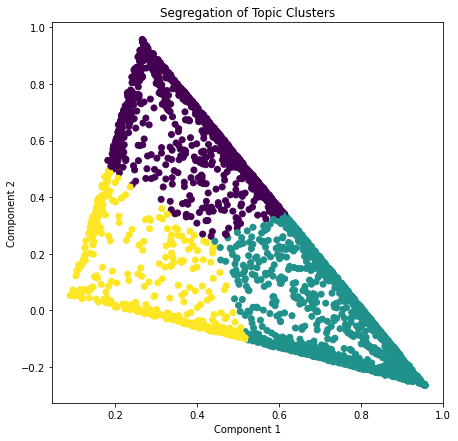

In [114]:
# Plot
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=clusters)
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

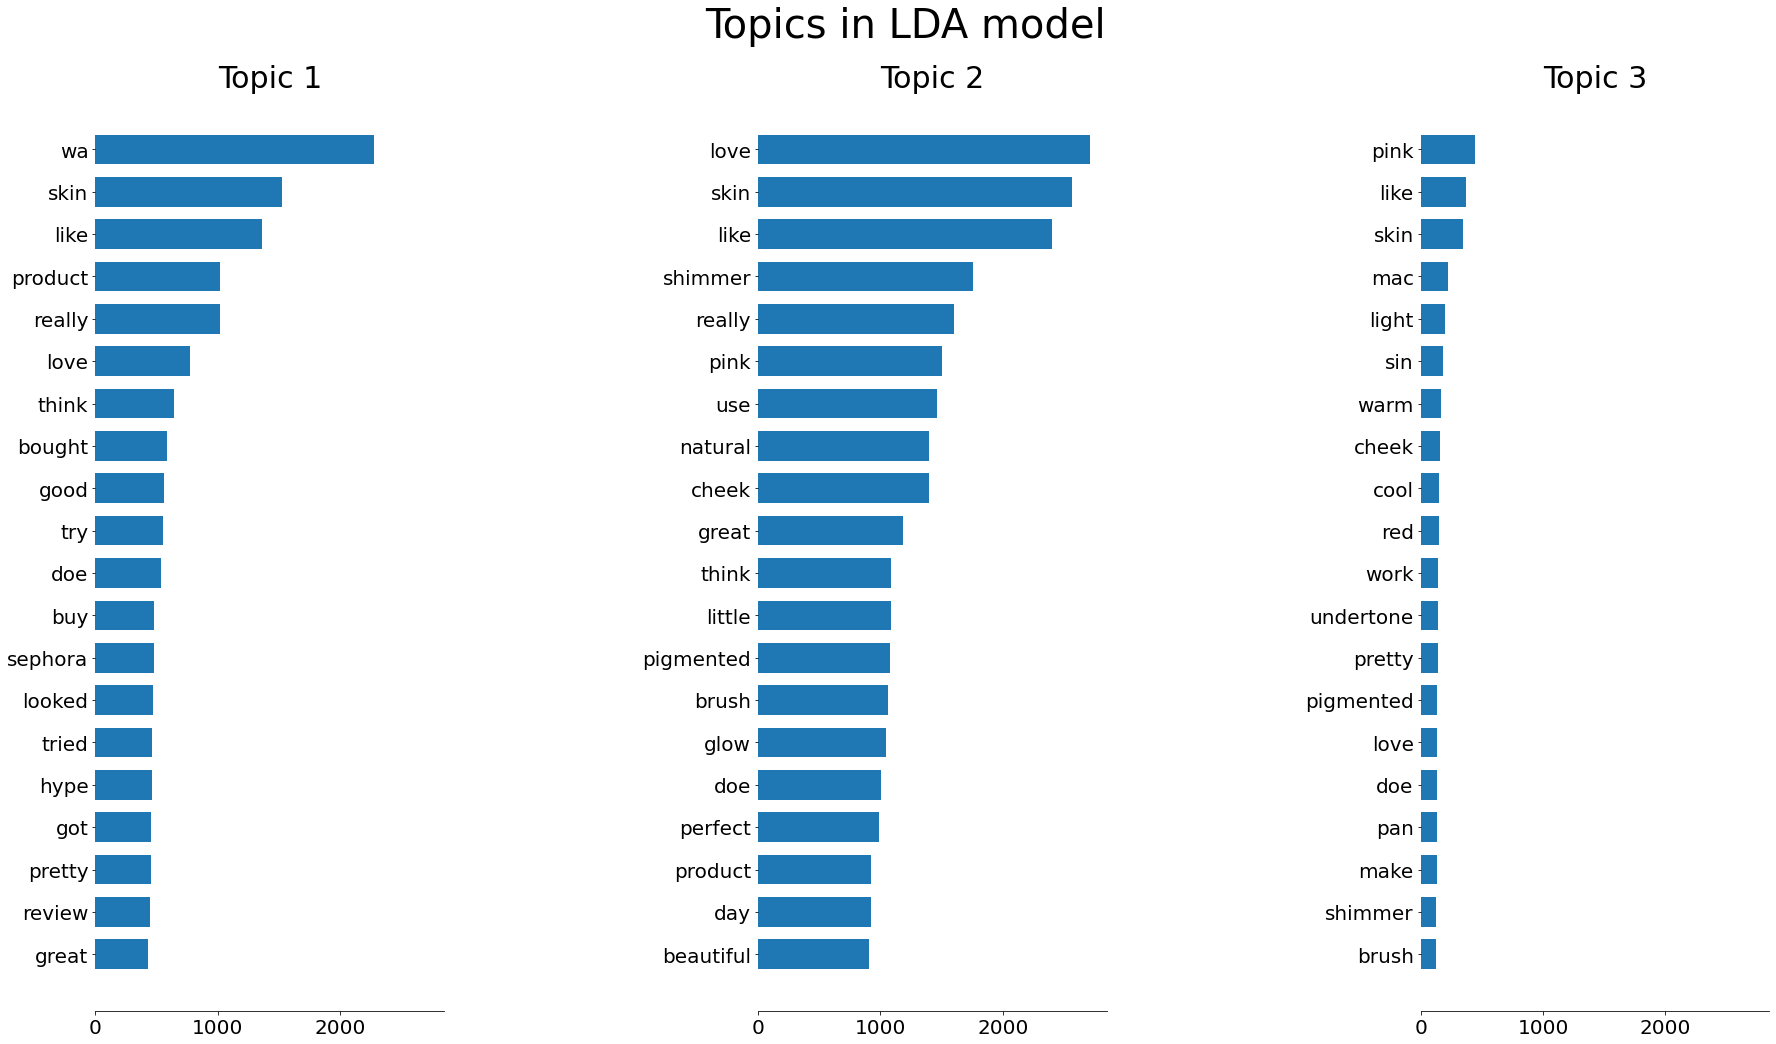

In [115]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
words = count_vectorizer.get_feature_names()
plot_top_words(lda, words, n_top_words, 'Topics in LDA model')

In [90]:
# Add topic feature into products 
products['dominant_topic'] = df_document_topic.reset_index()['dominant_topic']

In [76]:
# Create new features
products['polarity'] = products['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
products['subjectivity'] = products['review_processed_lower_punc'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
products['word_count'] = products['review_processed_lower_punc'].apply(lambda x: len(str(x).split(" ")))
products['char_count'] = products['review_processed_lower_punc'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
products['avg_word_length'] = products['char_count'] / products['word_count']

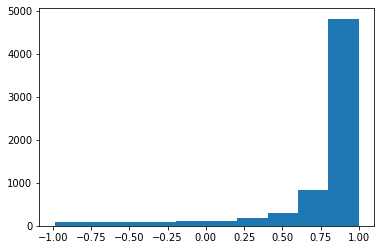

In [77]:
# TO BE REMOVED: just for our reference for sentiment score distribution
plt.hist(products['polarity'])
plt.show()

In [78]:
products.reset_index(inplace=True)

In [93]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6706 entries, 0 to 6705
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  6706 non-null   int64  
 1   date                                   6706 non-null   float64
 2   review                                 6706 non-null   object 
 3   repurchase                             6706 non-null   float64
 4   packaging                              6706 non-null   float64
 5   review_length                          6706 non-null   int64  
 6   repurchase_again                       6706 non-null   int64  
 7   review_processed                       6706 non-null   object 
 8   review_processed_lower                 6706 non-null   object 
 9   review_processed_lower_punc            6706 non-null   object 
 10  review_processed_punc                  6706 non-null   object 
 11  prod

In [80]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(products.loc[products['polarity'].sort_values(ascending=False)[:5].index]['review_processed_lower_punc']):
    print('Review {}:\n'.format(index+1),review)

print("\n5 Random Reviews with Highest Subjectivity:")
for index,review in enumerate(products.loc[products['subjectivity'].sort_values(ascending=False)[:5].index]['review_processed_lower_punc']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 yes it is a hyped product but after trying this i can certainly see why people adore iti must admit it took me a while to actually splurge and buy this a i could not justify spending on a single blush so i made my way through a number of cheaper dupe and liking the result on them decided to buy the real deal i almost returned it straight away thinking that i had a couple of very close dupe it would just be redundant to purchase but i am glad i did not a that assumption wa just so wrongfirst thing i noticed is the colour suit so well on my light to medium coolpeach toned skin i find it look nicer during winter month when i am slightly lighter and more cool toned the shimmer and blush base is delightfully finely milled which on my face translates to a radiant glow what it most reminds me of is the gentle flush you get when you have been exercising it really look like it is emanating from within your skin not a product sitting on top of i

In [94]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(products.loc[products['polarity'].sort_values(ascending=True)[:5].index]['review_processed_lower_punc']):
    print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Lowest Subjectivity:")
for index,review in enumerate(products.loc[products['subjectivity'].sort_values(ascending=True)[:5].index]['review_processed_lower_punc']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 bought into the hype and have regretted this purchase im and this colour barely showed up on me im olive and neutral toned leaning to the cooler side this came up a more of golden sheen with an extremely muted hint of peach basically unnoticeable my nars albatross highlighter basically doe the exact same thing i found the colour to be too sheer on me also this glowy sheen it left on me seemed to make my skin look bad after a couple of week of using this i noticed congestion under the skin on my cheek but i continued using it hoping it wa not the blush then when i would look in the mirror these bump of congestion would look really gross and amplified just drew more attention to the bump it wa causing and gave me pore on my cheek which i never had also unlike my benefit coralista plimented my blush at all i doubt anybody noticed but when i first bought it i wa so excited to be using such a highly rated exquisite blush i wa quite let downn

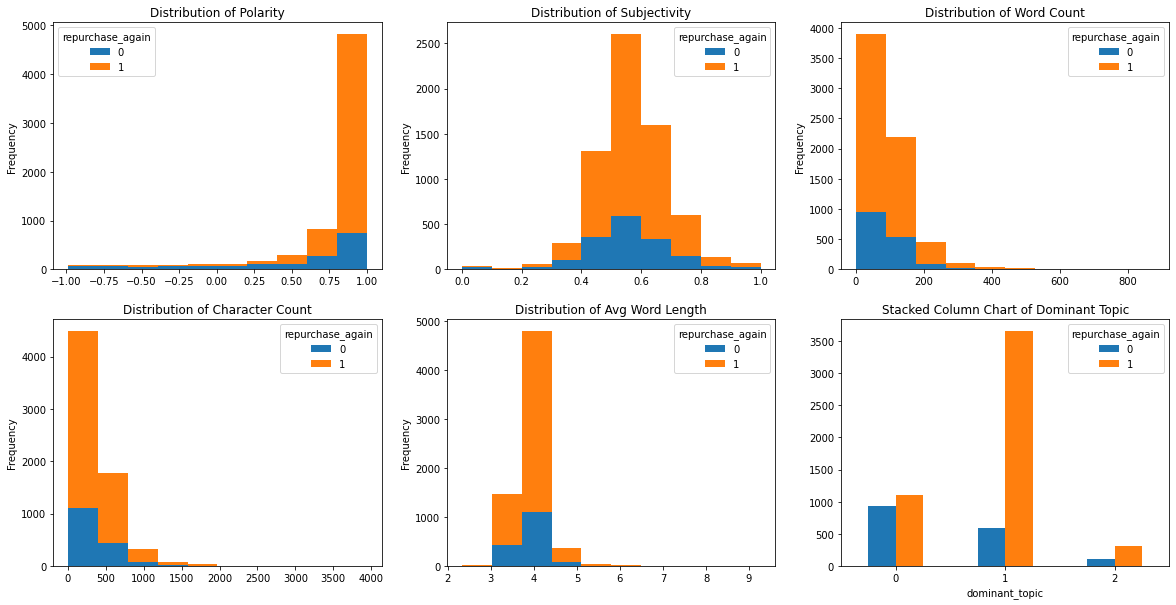

In [129]:
# Histogram of new features
fig, ax = plt.subplots(2,3,figsize=(20,10))
products.pivot(columns='repurchase_again').polarity.plot(kind = 'hist',stacked=True,ax=ax[0,0])
ax[0,0].title.set_text('Distribution of Polarity')
products.pivot(columns='repurchase_again').subjectivity.plot(kind = 'hist',stacked=True, ax=ax[0,1])
ax[0,1].title.set_text('Distribution of Subjectivity')
products.pivot(columns='repurchase_again').word_count.plot(kind = 'hist',stacked=True,ax=ax[0,2])
ax[0,2].title.set_text('Distribution of Word Count')
products.pivot(columns='repurchase_again').char_count.plot(kind = 'hist',stacked=True,ax=ax[1,0])
ax[1,0].title.set_text('Distribution of Character Count')
products.pivot(columns='repurchase_again').avg_word_length.plot(kind = 'hist',stacked=True,ax= ax[1,1])
ax[1,1].title.set_text('Distribution of Avg Word Length')
products.groupby(['dominant_topic','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='bar',ax=ax[1,2], rot=0)
ax[1,2].title.set_text('Stacked Column Chart of Dominant Topic')

# Similar distributions across the different target value
# Observe that topic 1 has higher frequency of repurchase

<AxesSubplot:title={'center':'avg_word_length'}, xlabel='repurchase_again'>

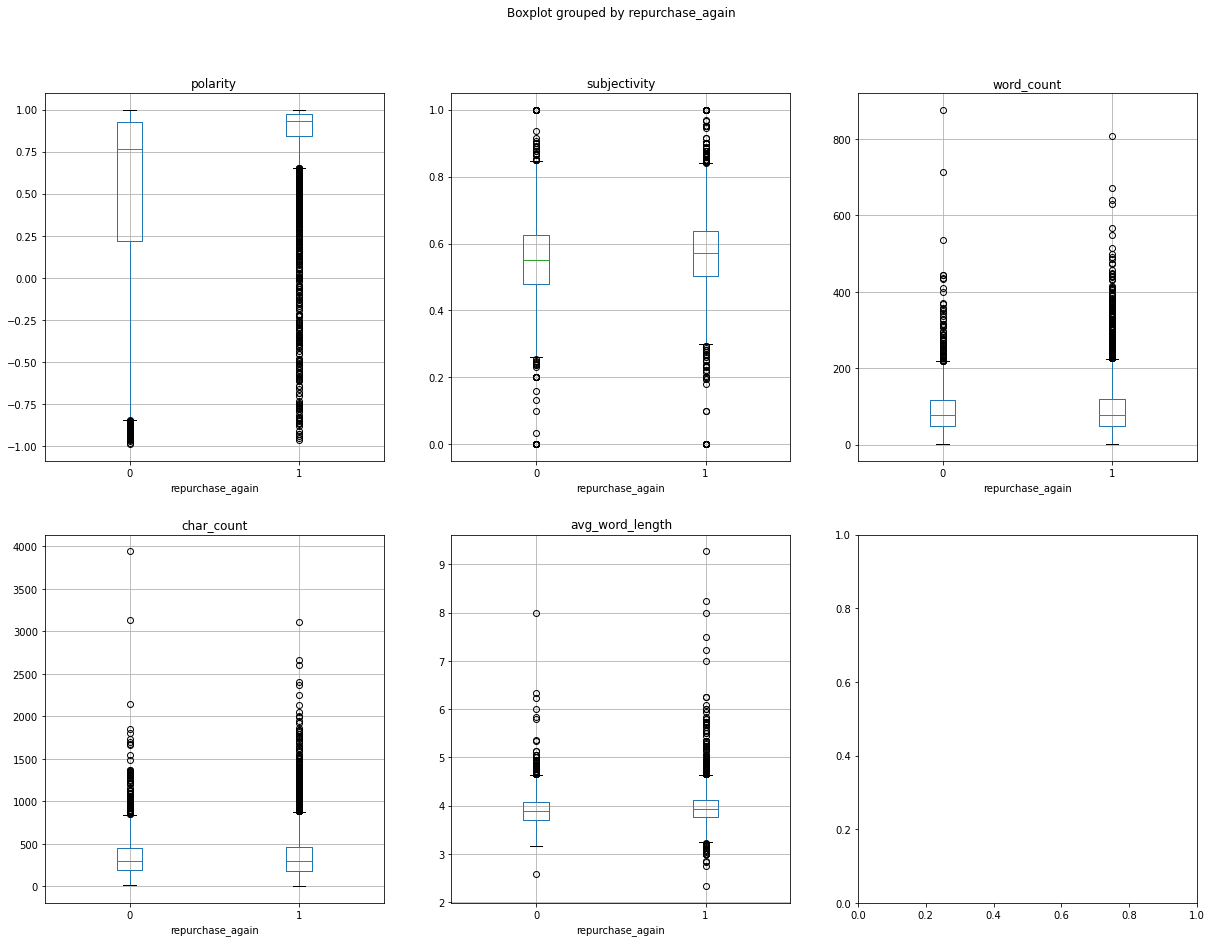

In [118]:
# Boxplot of new features
fig, ax = plt.subplots(2,3,figsize=(20,15))
products.boxplot('polarity',by='repurchase_again',ax=ax[0,0])
products.boxplot('subjectivity',by='repurchase_again',ax=ax[0,1])
products.boxplot('word_count',by='repurchase_again',ax=ax[0,2])
products.boxplot('char_count',by='repurchase_again',ax=ax[1,0])
products.boxplot('avg_word_length',by='repurchase_again',ax=ax[1,1])

# Those who repurchase again have higher polarity, higher subjectivity, similar word count, similar character count, higher average word length compared to those who don't repurchase again

In [97]:
products.describe()

,index,date,repurchase,packaging,review_length,repurchase_again,product_Blush - Angelika,product_Blush - Deep Throat,product_Blush - Dolce Vita,product_Blush - Exhibit A,...,age_36-43,age_44-55,age_56 & Over,age_Under 18,dominant_topic,polarity,subjectivity,word_count,char_count,avg_word_length
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,4690.188786,0.241972,0.502958,0.230639,486.307188,0.756785,0.024903,0.120191,0.023114,0.033403,...,0.089919,0.041008,0.010289,0.078288,0.762004,0.761122,0.568026,93.155532,366.599016,3.946490
std,3276.450919,0.196702,0.300575,0.288007,365.659387,0.429056,0.155841,0.325209,0.150276,0.179700,...,0.286088,0.198324,0.100920,0.268644,0.555651,0.387939,0.122187,68.301545,274.066352,0.344845
min,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.988100,0.000000,1.000000,4.000000,2.333333
25%,1678.250000,0.083333,0.258065,0.000000,250.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.770250,0.498156,49.000000,188.000000,3.741315
50%,3355.500000,0.166667,0.258065,0.000000,401.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.916800,0.566667,77.500000,303.000000,3.918919
75%,7852.750000,0.333333,0.774194,0.333333,614.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.966475,0.634696,118.000000,463.000000,4.101534
max,10103.000000,1.000000,1.000000,1.000000,5519.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.999500,1.000000,877.000000,3941.000000,9.266667


## Combining Twitter Data

# Export data for model building